In [1]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from pycaret.classification import *
s = ClassificationExperiment()
s.setup(data, target = 'Class variable', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [4]:
models()

ValueError: _CURRENT_EXPERIMENT global variable is not set. Please run setup() first.

In [5]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.2690
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0110
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0040
rf,Random Forest Classifier,0.7466,0.7920,0.5284,0.6795,0.5908,0.4117,0.4210,0.0210
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0050
catboost,CatBoost Classifier,0.7410,0.7993,0.5278,0.6630,0.5851,0.4005,0.4078,0.1380
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.0140
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.0120
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0040
et,Extra Trees Classifier,0.7243,0.7793,0.4857,0.6419,0.5487,0.3565,0.3663,0.0190


In [9]:
import pandas as pd

In [11]:
with pd.option_context('display.max_colwidth', None):
    print(s.models())

                                     Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   
dummy                    Dummy Classifier   

                                                      

In [4]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [7]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

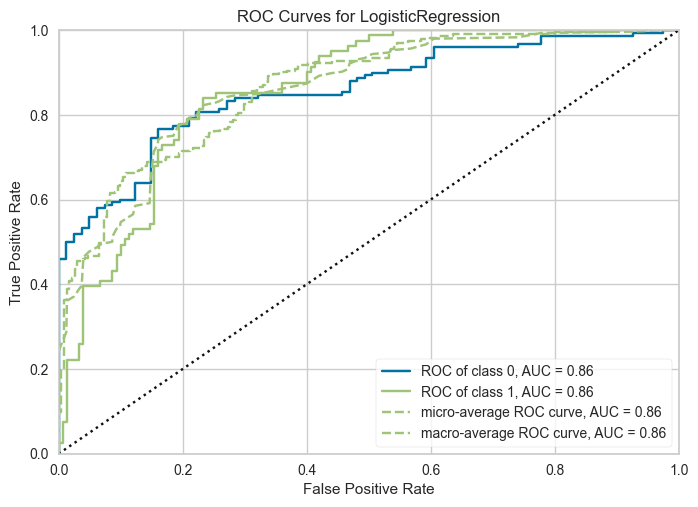

In [6]:

s.plot_model(best, plot = 'auc')

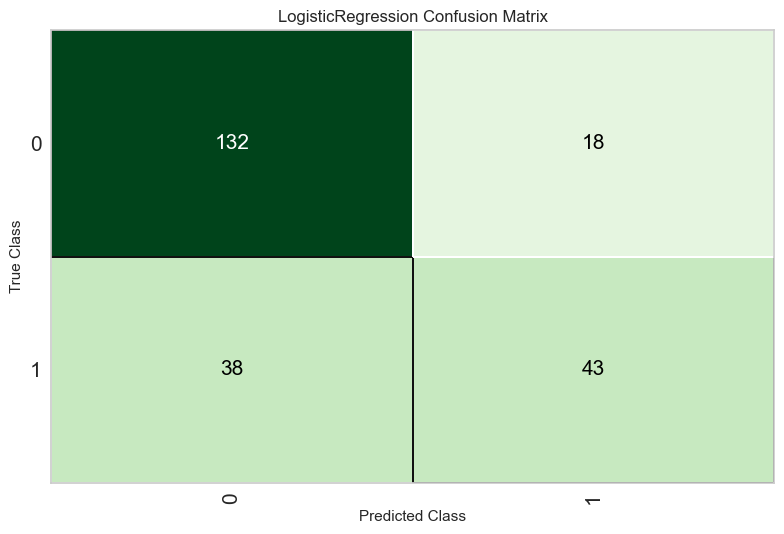

In [8]:

s.plot_model(best, plot = 'confusion_matrix')

In [9]:
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8037
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9394
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.7999
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.6393
...,...,...,...,...,...,...,...,...,...,...,...
85,2,110,74,29,125,32.400002,0.698,27,0,0,0.8002
7,10,115,0,0,0,35.299999,0.134,29,0,1,0.6230
298,14,100,78,25,184,36.599998,0.412,46,1,0,0.5984
341,1,95,74,21,73,25.900000,0.673,36,0,0,0.9244


In [10]:

predictions = s.predict_model(best, data=data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7773,0.8357,0.5709,0.7321,0.6415,0.4836,0.4915


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.6940
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9419
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.7976
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9454
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.8394


In [11]:
predictions = s.predict_model(best, data=data, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7773,0.8357,0.5709,0.7321,0.6415,0.4836,0.4915


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score_0,prediction_score_1
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.3060,0.6940
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9419,0.0581
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.2024,0.7976
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9454,0.0546
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.1606,0.8394
